In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

假设原始的函数关系为：
$y=2x^2+3x+4$ 
即：
$y=w_1  x^2 + w_2  x + b$

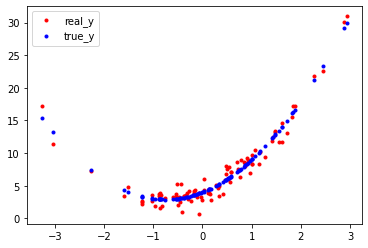

In [40]:
LENGTH = 100
X = tf.random.normal(shape = (LENGTH,))
noise = tf.random.normal(shape=(LENGTH,))
y = 2 * X ** 2 + 3 * X + 4 + noise
true_y = 2 * X ** 2 + 3 * X + 4

plt.figure()
plt.plot(X,y,'r.')
plt.plot(X,true_y,'b.')
plt.legend(['real_y','true_y'])
plt.show()


In [41]:
class Model:
    def __init__(self) :
        self.w1 = tf.Variable(10.0)
        self.w2 = tf.Variable(10.0)
        self.b = tf.Variable(10.0)
    def __call__(self,x):
        return self.w1 * x **2  + self.w2 * x + self.b

In [42]:
def loss(y,pred_y):
    return tf.reduce_mean(tf.square(y - pred_y))

def train(model,X,y,lr = 0.01):
    with tf.GradientTape as tape:
        current_loss = loss(y,model(X))
    d_w1 = tape.gradient(current_loss, model.w1)
    d_w2 = tape.gradient(current_loss, model.w2)
    d_b = tape.gradient(current_loss, model.b)

    model.w1.assign_sub(lr * d_w1)
    model.w2.assign_sub(lr * d_w2)
    model.b.assign_sub(lr * d_b)

In [44]:
model = Model()
w1s,w2s,bs = [], [], []
epochs = 20
for epoch in range(epochs):
    w1s.append(model.w1.numpy())  
    w2s.append(model.w2.numpy())
    bs.append(model.b.numpy())

    current_loss = loss(y, model(X))

    train(model, X, y, lr=0.01)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}")


AttributeError: __enter__